In [43]:
# 导
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
# load data
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['label'] = iris.target

# 修改列名
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]

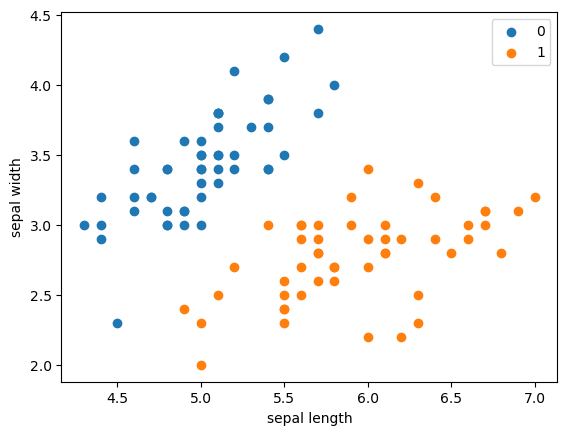

In [44]:
# 画图
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [31]:
# 截取数据集
data_df = df.loc[:100-1,['sepal length','sepal width','label']]
data = np.array(data_df)
X_arr,y_arr = data[:,:2],data[:,-1]
y_arr = np.array([ 1 if i == 1 else -1 for i in y_arr])

## 感知机

In [37]:
# 定义感知机类
class Perceptron:
    
    # 初始化W,b,步长
    def __init__(self,Xarr_train,yarr_train,l_rate=0.1):    
        self.W = np.zeros(len(Xarr_train[0]))
        self.b = 0
        self.l_rate = l_rate
        self.Xarr_train = Xarr_train
        self.yarr_train = yarr_train
    
    # 随机梯度下降
    def sgd(self,Xi,yi):
        # 判断是否是误分类点
        tmp = yi * (np.dot(self.W,Xi) + self.b)
        if(tmp <= 0):
            self.W = self.W + self.l_rate * np.dot(yi,Xi)
            self.b = self.b + self.l_rate * yi
            # print(self.W,self.b,end=" ")
            return False
        return True
    
    # 循环过程
    def fit(self):
        while True:
            wrong_count = 0 # 误分类点个数
            for i in range(len(self.Xarr_train)-1):
                # print(i)
                is_right = self.sgd(self.Xarr_train[i],self.yarr_train[i])
                if is_right:
                    pass
                else:
                    wrong_count+=1
            # print(wrong_count,end=" ")
            if wrong_count != 0:
                continue
            else:
                return self.W,self.b
    

In [38]:
# 带入数据
iris_perceptron = Perceptron(X_arr,y_arr)
W,b = iris_perceptron.fit()

In [39]:
W,b

(array([  7.9 , -10.07]), -12.399999999999972)

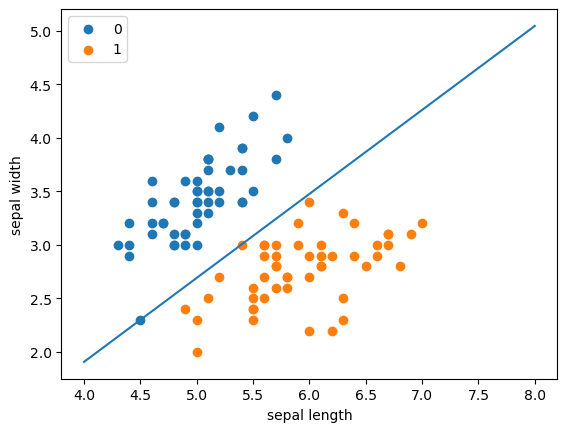

In [46]:
# 画图
x_points = np.linspace(4,8,1000)
y_ = -(W[0]*x_points+b)/W[1]
plt.plot(x_points,y_)

plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()